In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Ridge

from hkan import (
    Sigmoid, Gaussian, ReLU, Softplus, Tanh, Identity,
    make_hkan_layer, extend_hkan,
    set_tqdm_disable
)
from datasets import load_dataset

In [2]:
data = load_dataset("TF5")
X_train, X_test, y_train, y_test = data["train_input"], data["test_input"], data["train_label"], data["test_label"]

model = make_hkan_layer(
    layer_idx=0,
    n_vars_out=912,
    basis_fn=Tanh(s=50),
    n_basis=23,
    centers="random",
    expanding_base_regressor=Ridge(alpha=0.01),
)

model = extend_hkan(
    model,
    layer_idx=1,
    n_vars_out=1,
    basis_fn=Identity(),
    centers="random_data_points",
    expanding_base_regressor=Ridge(alpha=0.1),
)

model

Pipeline(steps=[('expanding_layer_0',
                 ExpandingLayer(base_regressor=Ridge(alpha=0.01),
                                basis_fn=<hkan.Tanh object at 0x7f1b81ccca70>,
                                n_basis=23, n_vars_out=912)),
                ('connecting_layer_0', ConnectingLayer()),
                ('expanding_layer_1',
                 ExpandingLayer(base_regressor=Ridge(alpha=0.1),
                                basis_fn=<hkan.Identity object at 0x7f1b862461b0>,
                                centers='random_data_points', n_vars_out=1)),
                ('connecting_layer_1', ConnectingLayer())])

In [3]:
set_tqdm_disable(False)

In [4]:
model.fit(X_train, y_train);

Fitting connecting regressors: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


In [5]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:g}")

RMSE: 4.69134e-15


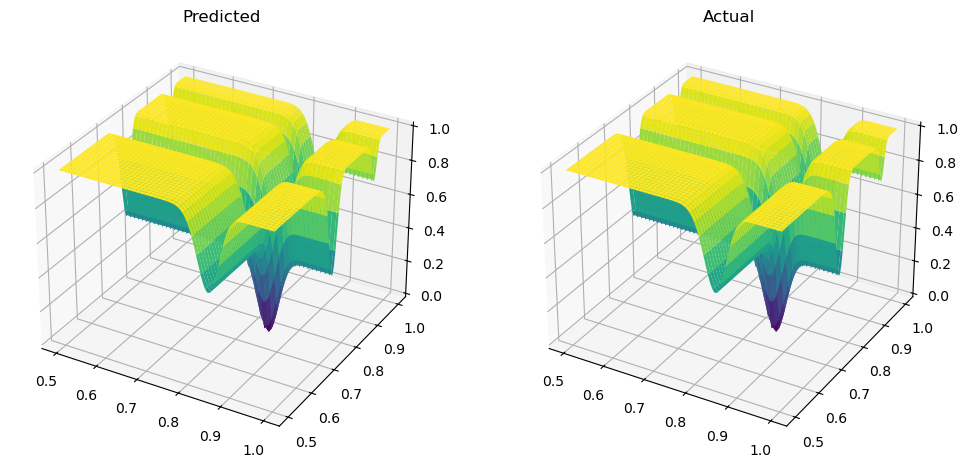

In [6]:
fig = plt.figure(figsize=(12, 6))
X1, X2 = X_test[:, 0].reshape(100, 100), X_test[:, 1].reshape(100, 100)
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(X1, X2, y_pred.reshape(100, 100), cmap="viridis")
ax.set_title("Predicted")
ax = fig.add_subplot(122, projection="3d")
ax.plot_surface(X1, X2, y_test.reshape(100, 100), cmap="viridis")
ax.set_title("Actual");